In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import pickle

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [4]:
df.tail()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
50548,17315,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,NETHERLANDS,99.0,59.40,NaN,50
50549,35595,EPX,Travel Agency,Online,1 way Comprehensive Plan,0,48,INDONESIA,20.0,0.00,NaN,36
50550,54146,KML,Travel Agency,Online,Value Plan,0,24,INDONESIA,28.0,10.64,F,48
50551,28667,EPX,Travel Agency,Online,Cancellation Plan,0,25,BELGIUM,15.0,0.00,NaN,36
50552,50880,EPX,Travel Agency,Online,1 way Comprehensive Plan,0,9,SINGAPORE,20.0,0.00,NaN,59


In [5]:
df.shape

(50553, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    50553 non-null  int64  
 1   Agency                50553 non-null  object 
 2   Agency Type           50553 non-null  object 
 3   Distribution Channel  50553 non-null  object 
 4   Product Name          50553 non-null  object 
 5   Claim                 50553 non-null  int64  
 6   Duration              50553 non-null  int64  
 7   Destination           50553 non-null  object 
 8   Net Sales             50553 non-null  float64
 9   Commision (in value)  50553 non-null  float64
 10  Gender                14600 non-null  object 
 11  Age                   50553 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


In [7]:
df.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  35953
Age                         0
dtype: int64

In [8]:
df.isnull().sum()/len(df) * 100

ID                       0.000000
Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Claim                    0.000000
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Gender                  71.119419
Age                      0.000000
dtype: float64

In [9]:
df.corr()["Claim"]

ID                      0.040265
Claim                   1.000000
Duration                0.076442
Net Sales               0.138323
Commision (in value)    0.102009
Age                    -0.012106
Name: Claim, dtype: float64

In [10]:
print(df["Claim"].value_counts(), "\n")

0    49812
1      741
Name: Claim, dtype: int64 



In [11]:
(df["Claim"].value_counts()*100)/len(df)

0    98.534212
1     1.465788
Name: Claim, dtype: float64

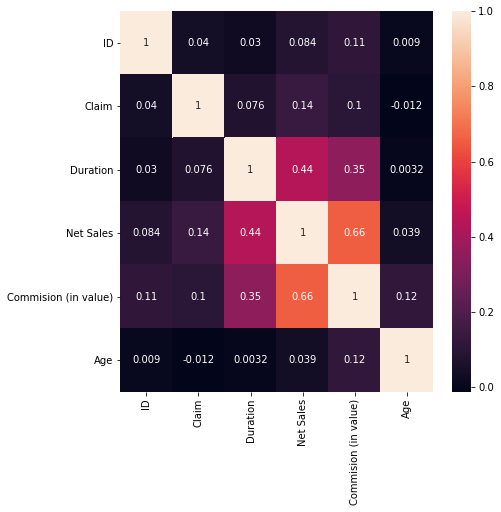

In [12]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [13]:
df["Gender"].unique()

array([nan, 'F', 'M'], dtype=object)

In [14]:
df["Gender"].value_counts()

M    7527
F    7073
Name: Gender, dtype: int64

In [15]:
(df['Gender'].isnull().sum()/df.shape[0]*100).round(2)

71.12

In [16]:
df.drop(["Gender"],axis=1,inplace=True)

In [17]:
(df['ID'].isnull().sum()/df.shape[0]*100).round(2)

0.0

In [18]:
df.drop(["ID"],axis=1,inplace=True)

In [19]:
len(df[df["Age"] > 100])

795

In [20]:
mean_senior = df["Age"][df["Age"] > 70].mean()

In [21]:
df["Age"][df["Age"] > 60] = mean_senior

In [22]:
df.nunique()

Agency                    16
Agency Type                2
Distribution Channel       2
Product Name              25
Claim                      2
Duration                 444
Destination              102
Net Sales               1053
Commision (in value)     964
Age                       60
dtype: int64

In [23]:
from scipy.stats import skew

In [24]:
duration = df[df["Duration"] < 0].index

In [25]:
duration

Int64Index([4063, 38935, 48367], dtype='int64')

In [26]:
df.drop(duration, inplace=True)

In [27]:
df["Duration"][df["Duration"] > 360] = 360

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()

In [30]:
df_cat = df.select_dtypes("object")
df_num = df.select_dtypes(include=["int64","float64"])

In [31]:
le.fit_transform(df["Distribution Channel"])

array([1, 1, 1, ..., 1, 1, 1])

In [32]:
le.fit_transform(df["Agency Type"])

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
df_cat.head()

,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA
1,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,INDONESIA
4,EPX,Travel Agency,Online,Cancellation Plan,"KOREA, REPUBLIC OF"


In [34]:
df_num.head()

,Claim,Duration,Net Sales,Commision (in value),Age
0,0,7,0.0,17.82,31.000000
1,0,85,69.0,0.00,36.000000
2,0,11,19.8,11.88,101.108415
3,0,16,20.0,0.00,32.000000
4,0,10,15.0,0.00,29.000000


In [35]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [36]:
df_new = pd.concat([df_num,df_cat],axis=1)

In [37]:
df_new.head()

,Claim,Duration,Net Sales,Commision (in value),Age,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,0,7,0.0,17.82,31.000000,6,1,1,16,56
1,0,85,69.0,0.00,36.000000,7,1,1,10,79
2,0,11,19.8,11.88,101.108415,6,1,1,16,56
3,0,16,20.0,0.00,32.000000,7,1,1,1,38
4,0,10,15.0,0.00,29.000000,7,1,1,10,47


In [38]:
df_num.describe()

,Claim,Duration,Net Sales,Commision (in value),Age
count,50550.000000,50550.000000,50550.000000,50550.000000,50550.000000
mean,0.014659,47.957033,40.802251,9.838272,41.279132
std,0.120184,71.808611,48.900852,19.910616,17.136607
min,0.000000,0.000000,-389.000000,0.000000,0.000000
25%,0.000000,9.000000,18.000000,0.000000,35.000000
50%,0.000000,22.000000,26.500000,0.000000,36.000000
75%,0.000000,53.000000,48.000000,11.550000,44.000000
max,1.000000,360.000000,810.000000,283.500000,101.108415


In [39]:
skew(df_num["Commision (in value)"])

4.077929249694879

In [40]:
df_num["Commision (in value)"] = np.sqrt(df_num["Commision (in value)"])

In [41]:
skew(df_num["Commision (in value)"])

1.3513398200630384

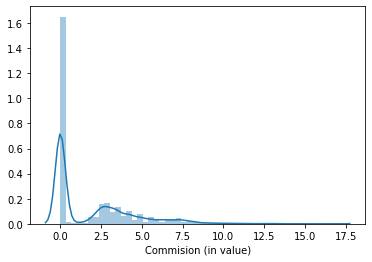

In [42]:
sns.distplot(df_num["Commision (in value)"])

In [43]:
skew(df_num["Age"])

2.5043395070093535

In [44]:
df_num["Age"] = np.sqrt(df_num["Age"])

In [45]:
skew(df_num["Age"])

1.9417002579049916

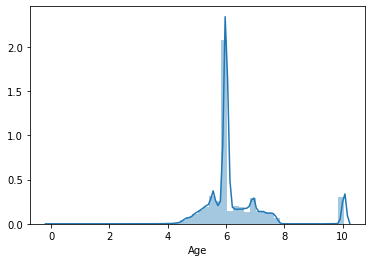

In [46]:
sns.distplot(df_num["Age"])

In [47]:
skew(df_num["Duration"])

3.0381146944318584

In [48]:
df_num["Duration"] = np.sqrt(df_num["Duration"])

In [49]:
skew(df_num["Duration"])

1.6361035948952554

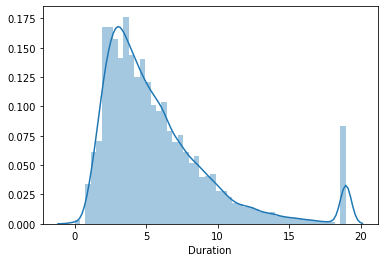

In [50]:
sns.distplot(df_num["Duration"])

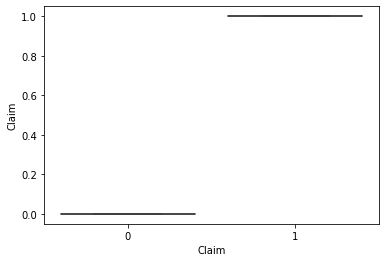

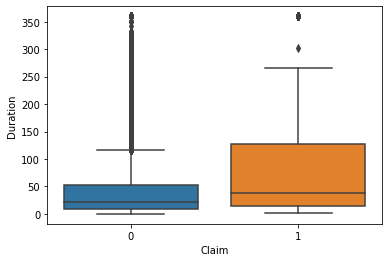

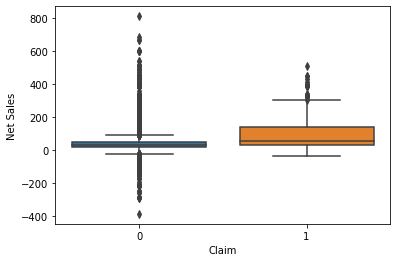

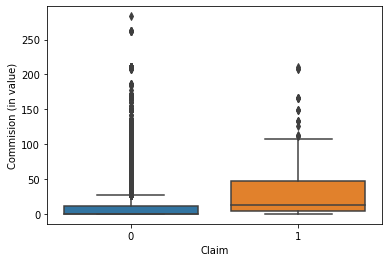

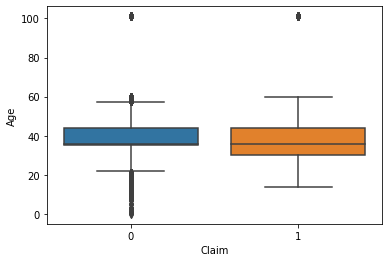

In [51]:
for col in df_num:
    plt.figure()
    sns.boxplot(data=df, y=col, x="Claim")
    plt.show()

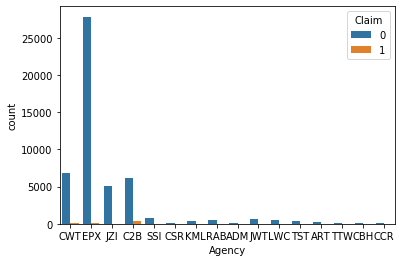

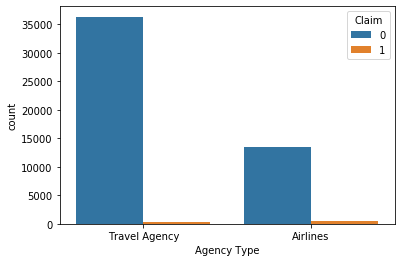

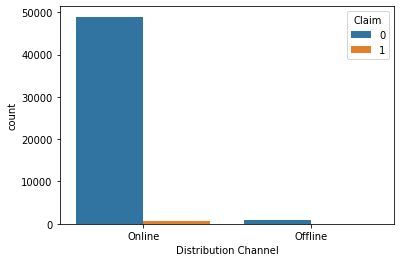

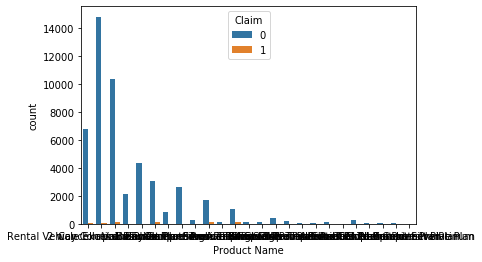

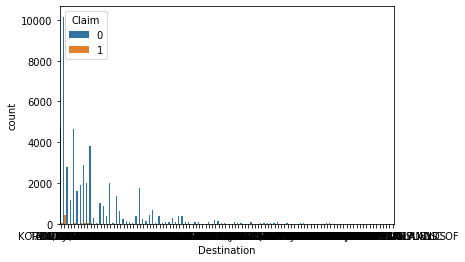

In [52]:
for col in df_cat:
    plt.figure()
    sns.countplot(data=df,x=col,hue="Claim")
    plt.show()

In [53]:
df["Age"][df["Age"] > 60] = mean_senior

In [54]:
df["Duration"][df["Duration"] > 360] = 360

In [55]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50550 entries, 0 to 50552
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Claim                 50550 non-null  int64  
 1   Duration              50550 non-null  int64  
 2   Net Sales             50550 non-null  float64
 3   Commision (in value)  50550 non-null  float64
 4   Age                   50550 non-null  float64
 5   Agency                50550 non-null  int32  
 6   Agency Type           50550 non-null  int32  
 7   Distribution Channel  50550 non-null  int32  
 8   Product Name          50550 non-null  int32  
 9   Destination           50550 non-null  int32  
dtypes: float64(3), int32(5), int64(2)
memory usage: 5.8 MB


In [56]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [57]:
X = df_new.drop('Claim', axis = 1)
y = df_new['Claim']
print(Counter(y))

Counter({0: 49809, 1: 741})


0    49809
1      741
Name: Claim, dtype: int64
---------------------------------------------------


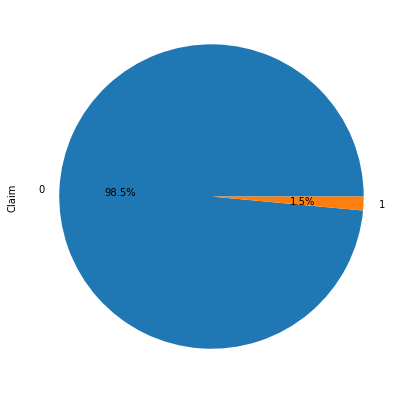

In [58]:
print(df["Claim"].value_counts())
print("---------------------------------------------------")
plt.figure(figsize=(7,7))
df["Claim"].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [60]:
oversample = RandomOverSampler(random_state=1)
X_over, y_over = oversample.fit_sample(X_train, y_train)
print(Counter(y_over))

Counter({0: 34857, 1: 34857})


In [61]:
pd.Series(y_over).value_counts()

1    34857
0    34857
Name: Claim, dtype: int64

In [62]:
# Baseline Model

In [63]:
lr = LogisticRegression()

In [64]:
lr.fit(X_over, y_over)

LogisticRegression()

In [65]:
y_pred = lr.predict(X_test)

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     14952
           1       0.05      0.62      0.10       213

    accuracy                           0.84     15165
   macro avg       0.52      0.73      0.50     15165
weighted avg       0.98      0.84      0.90     15165



In [67]:
## ADA Boosting

In [68]:
from sklearn.ensemble import AdaBoostClassifier

In [69]:
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_over, y_over)

AdaBoostClassifier(n_estimators=100)

In [70]:
y_pred = ada.predict(X_test)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89     14952
           1       0.05      0.67      0.09       213

    accuracy                           0.81     15165
   macro avg       0.52      0.74      0.49     15165
weighted avg       0.98      0.81      0.88     15165



In [72]:
## Gradient Boosting

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_over, y_over)

GradientBoostingClassifier()

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89     14952
           1       0.05      0.67      0.09       213

    accuracy                           0.81     15165
   macro avg       0.52      0.74      0.49     15165
weighted avg       0.98      0.81      0.88     15165



In [76]:
## Xtreme Gradient Boosting

In [77]:
from xgboost import XGBClassifier

In [78]:
xgb = XGBClassifier(n_estimators=200,reg_alpha=1)

In [79]:
xgb.fit(X_over, y_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
y_pred = xgb.predict(X_test)

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     14952
           1       0.07      0.20      0.11       213

    accuracy                           0.95     15165
   macro avg       0.53      0.58      0.54     15165
weighted avg       0.98      0.95      0.96     15165



## Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf = RandomForestClassifier(n_estimators=5,random_state=1,max_depth=10,min_samples_leaf=25)

In [84]:
rf.fit(X_over, y_over)

RandomForestClassifier(max_depth=10, min_samples_leaf=25, n_estimators=5,
                       random_state=1)

In [85]:
y_pred = rf.predict(X_test)

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90     14952
           1       0.05      0.62      0.09       213

    accuracy                           0.83     15165
   macro avg       0.52      0.72      0.50     15165
weighted avg       0.98      0.83      0.89     15165



In [87]:
oversample = RandomOverSampler(sampling_strategy="minority")
X_over, y_over = oversample.fit_resample(X, y)
print(Counter(y_over))

Counter({0: 49809, 1: 49809})


In [88]:
## Baseline Model 2

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=1)

In [90]:
lr1 = LogisticRegression()

In [91]:
lr1.fit(X_train, y_train)

LogisticRegression()

In [92]:
y_pred = lr1.predict(X_test)

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77     15096
           1       0.80      0.65      0.71     14790

    accuracy                           0.74     29886
   macro avg       0.75      0.74      0.74     29886
weighted avg       0.75      0.74      0.74     29886



In [94]:
## Random Forest Classifier 2

In [95]:
rf1 = RandomForestClassifier(n_estimators=5,random_state=1,max_depth=10,min_samples_leaf=25)

In [96]:
rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=25, n_estimators=5,
                       random_state=1)

In [97]:
y_pred = rf1.predict(X_test)

In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85     15096
           1       0.84      0.86      0.85     14790

    accuracy                           0.85     29886
   macro avg       0.85      0.85      0.85     29886
weighted avg       0.85      0.85      0.85     29886



In [99]:
## Xtreme Gradient Boosting 2

In [100]:
xgb1 = XGBClassifier(n_estimators=200,reg_alpha=1)

In [101]:
xgb1.fit(X_over, y_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [102]:
y_pred = xgb1.predict(X_test)

In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15096
           1       0.96      1.00      0.98     14790

    accuracy                           0.98     29886
   macro avg       0.98      0.98      0.98     29886
weighted avg       0.98      0.98      0.98     29886



In [105]:
file = open("Insurance.ser", "wb")
pickle.dump(rf1, file)
file.close()